# This Notebook Includes with Data Visualisation, Trends and Lastly Time Series Analysis

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import lazypredict
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Reading the Tabular Data as a Data Frame
df=pd.read_csv(r'E:\bank-data\bank-tabular.csv', sep="\t")
df

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,265459,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,NaN,4.0,4.0,NaN,True
3,58770,2022-03-13,f,NaN,Leinster,Business,True,False,NaN,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False
2996,53418,2021-03-07,f,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True
2997,79364,2021-08-01,m,NaN,Munster,Personal,True,True,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,False
2998,371134,2021-06-25,m,42.0,Leinster,Business,False,False,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,True


In [3]:
#Checking for missing values in all columns
df.isna().sum()

customer_id                0
date                       0
customer_gender          312
customer_age             470
customer_location        365
customer_type              0
has_cc                     0
has_mortgage               0
convenience               64
customer_service          29
online_banking            30
interest_rates           165
fees_charges              76
community_involvement    300
products_services        100
privacy_security         262
reputation               402
satisfied                  0
dtype: int64

### Since the data is categorical in nature, the rule of thumb is to fill missing values of that column by its mode

In [4]:
df['customer_age'].fillna(value=df['customer_age'].mode()[0], inplace=True)
df['interest_rates'].fillna(value=df['interest_rates'].mode()[0], inplace=True)
df['customer_location'].fillna(value=df['customer_location'].mode()[0], inplace=True)
df['customer_gender'].fillna(value=df['customer_gender'].mode()[0], inplace=True)
df['convenience'].fillna(value=df['convenience'].mode()[0], inplace=True)
df['customer_service'].fillna(value=df['customer_service'].mode()[0], inplace=True)
df['online_banking'].fillna(value=df['online_banking'].mode()[0], inplace=True)
df['fees_charges'].fillna(value=df['fees_charges'].mode()[0], inplace=True)
df['community_involvement'].fillna(value=df['community_involvement'].mode()[0], inplace=True)
df['products_services'].fillna(value=df['products_services'].mode()[0], inplace=True)
df['privacy_security'].fillna(value=df['privacy_security'].mode()[0], inplace=True)
df['reputation'].fillna(value=df['reputation'].mode()[0], inplace=True)

In [5]:
#Successfully removed missing values
df.isna().sum()

customer_id              0
date                     0
customer_gender          0
customer_age             0
customer_location        0
customer_type            0
has_cc                   0
has_mortgage             0
convenience              0
customer_service         0
online_banking           0
interest_rates           0
fees_charges             0
community_involvement    0
products_services        0
privacy_security         0
reputation               0
satisfied                0
dtype: int64

In [6]:
#Cleaning gender column
df['customer_gender'] = df['customer_gender'].str.replace('Not specified','Undisclosed')
df['customer_gender'] = df['customer_gender'].str.replace('Unspecified','Undisclosed')
df['customer_gender'] = df['customer_gender'].str.replace('f','Female')
df['customer_gender'] = df['customer_gender'].str.replace('m','Male')
df['customer_gender'] = df['customer_gender'].str.replace('FeMaleale','Female')
df

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,265459,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,4.0,4.0,4.0,4.0,True
3,58770,2022-03-13,Female,48.0,Leinster,Business,True,False,2.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False
2996,53418,2021-03-07,Female,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True
2997,79364,2021-08-01,Male,48.0,Munster,Personal,True,True,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,False
2998,371134,2021-06-25,Male,42.0,Leinster,Business,False,False,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,True


In [7]:
#Dropping unnecessary columns
df.drop(['customer_id'],axis=1,inplace=True)
df

,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,4.0,4.0,4.0,4.0,True
3,2022-03-13,Female,48.0,Leinster,Business,True,False,2.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False
2996,2021-03-07,Female,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True
2997,2021-08-01,Male,48.0,Munster,Personal,True,True,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,False
2998,2021-06-25,Male,42.0,Leinster,Business,False,False,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,True


## Visualisation of all Categorical Data

(array([153., 353., 385., 365., 902., 400., 275., 134.,  28.,   5.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

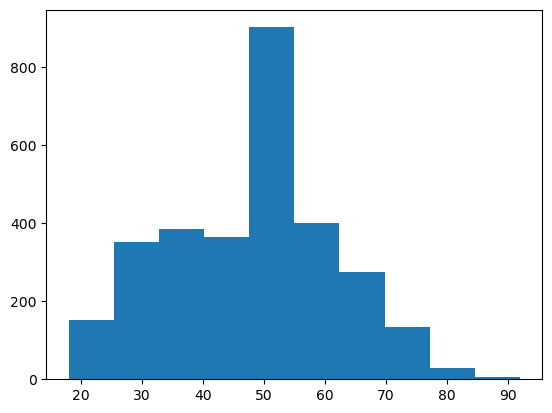

In [8]:
plt.hist(df['customer_age'])

Text(0.5, 1.0, 'Distribution of Customer Gender')

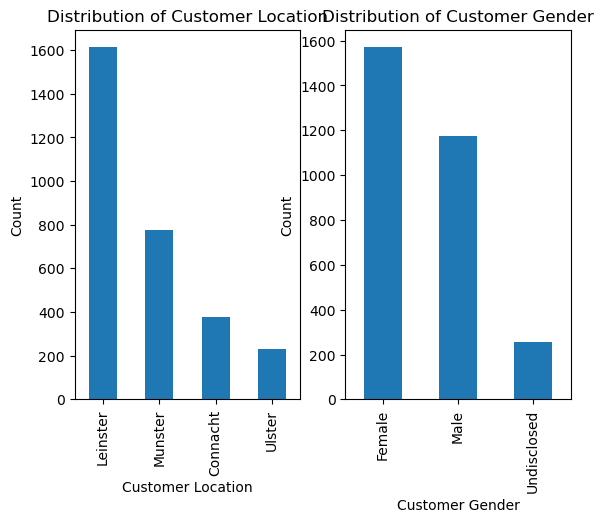

In [9]:
plt.show()
plt.subplot(1, 2, 1)
df['customer_location'].value_counts().plot(kind='bar')
plt.xlabel('Customer Location')
plt.ylabel('Count')
plt.title('Distribution of Customer Location')


plt.subplot(1, 2, 2)
df['customer_gender'].value_counts().plot(kind='bar')
plt.xlabel('Customer Gender')
plt.ylabel('Count')
plt.title('Distribution of Customer Gender')


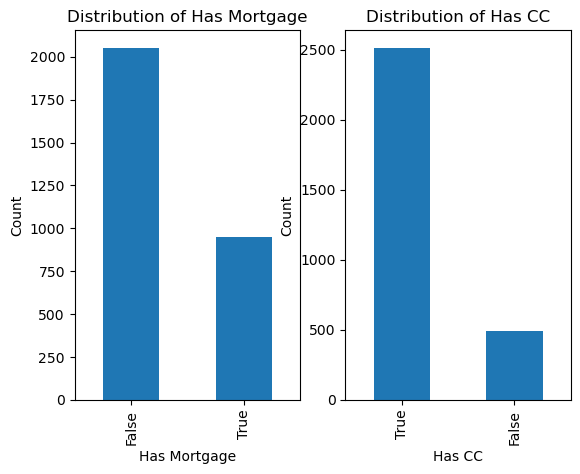

In [10]:
plt.subplot(1, 2, 1)
df['has_mortgage'].value_counts().plot(kind='bar')
plt.xlabel('Has Mortgage')
plt.ylabel('Count')
plt.title('Distribution of Has Mortgage')

plt.subplot(1, 2, 2)
df['has_cc'].value_counts().plot(kind='bar')
plt.xlabel('Has CC')
plt.ylabel('Count')
plt.title('Distribution of Has CC')
plt.show() 


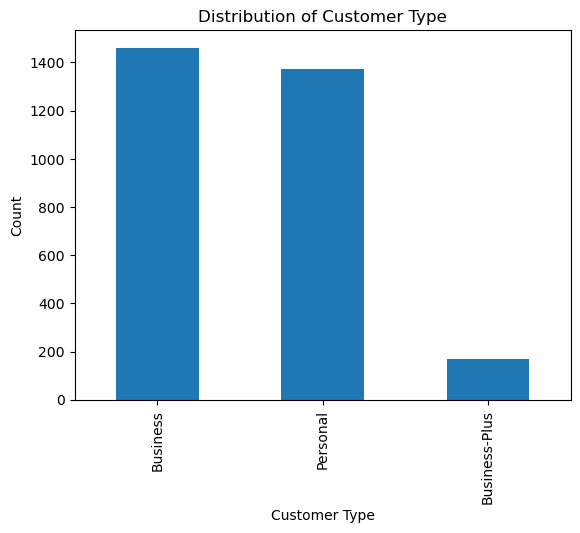

In [11]:
df['customer_type'].value_counts().plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Distribution of Customer Type')
plt.show()

### Inference: The distribution of different categorical data points towards the following trends: Majority Customers are between ages 50 and 60, belong to Leinster and are Female.
### Also, most customers have both mortgage and CC, and the maximum number of accounts are business accounts, with personal accounts in close second

## Plotting Relationships of all Continuous Columns with Satisfied Class, and visualising influence of Cash Credit(has_cc), which would be the most important factor out of all the columns for a bank.
## Furthermore, inferences have been drawn on these relationships whenever indicated.

<Axes: xlabel='satisfied', ylabel='convenience'>

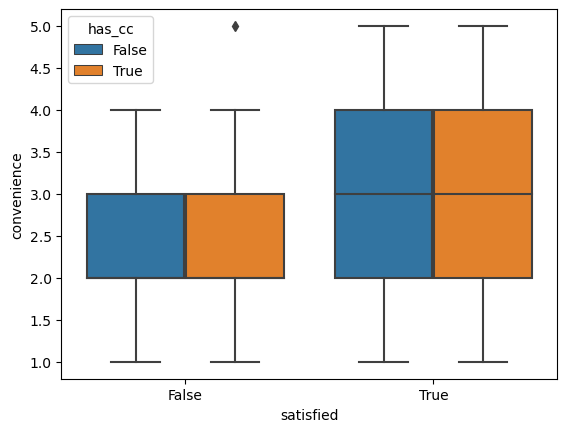

In [12]:
sns.boxplot(x='satisfied',y='convenience',data=df,hue='has_cc')

<Axes: xlabel='satisfied', ylabel='customer_service'>

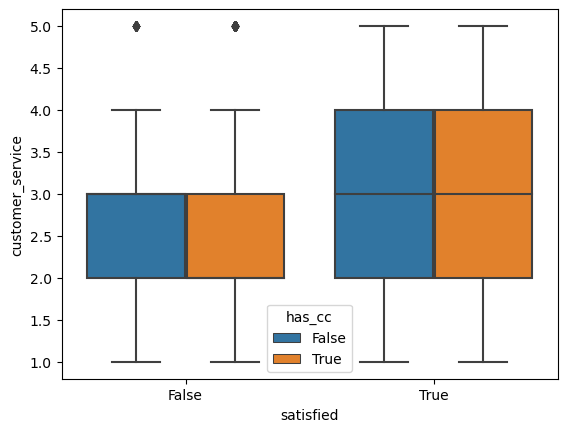

In [13]:
sns.boxplot(x='satisfied',y='customer_service',data=df,hue='has_cc')

### Most customers rated 'convenience' and 'customer service' between 2 and 4

<Axes: xlabel='satisfied', ylabel='online_banking'>

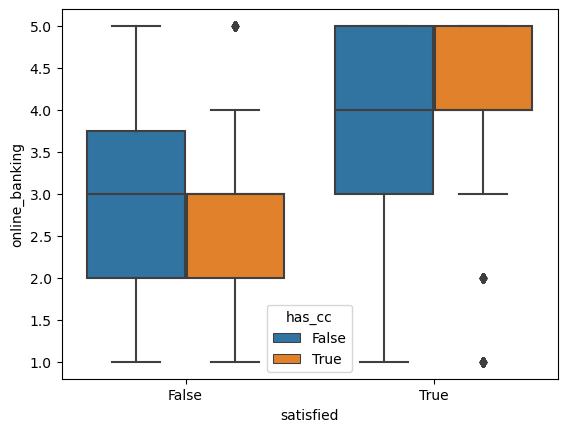

In [14]:
sns.boxplot(x='satisfied',y='online_banking',data=df,hue='has_cc')

<Axes: xlabel='satisfied', ylabel='interest_rates'>

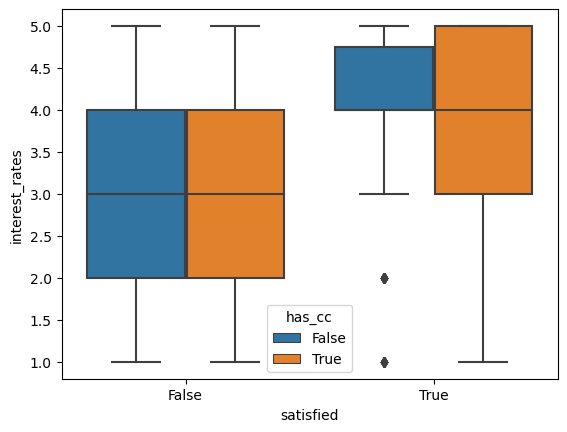

In [15]:
sns.boxplot(x='satisfied',y='interest_rates',data=df,hue='has_cc')

<Axes: xlabel='satisfied', ylabel='fees_charges'>

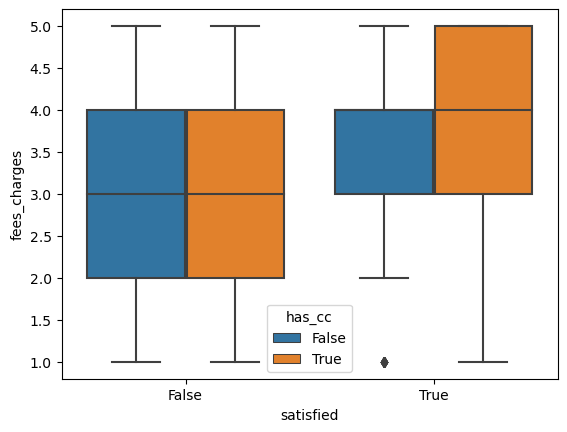

In [16]:
sns.boxplot(x='satisfied',y='fees_charges',data=df,hue='has_cc')

### For the most part, customers rated 'interest rates' and 'fees charges' similarly, while satisfied customers have generally given these commodities higher ratings

<Axes: xlabel='satisfied', ylabel='community_involvement'>

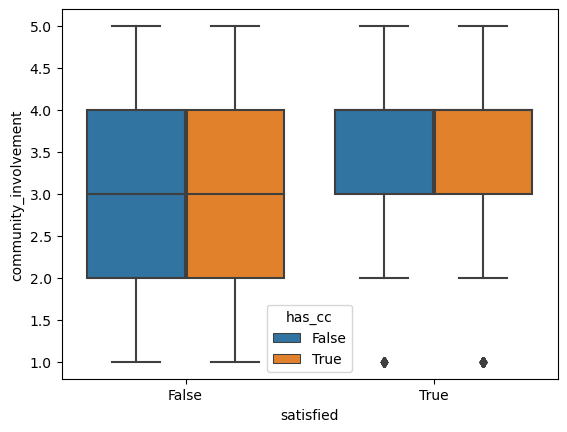

In [17]:
sns.boxplot(x='satisfied',y='community_involvement',data=df,hue='has_cc')

<Axes: xlabel='satisfied', ylabel='reputation'>

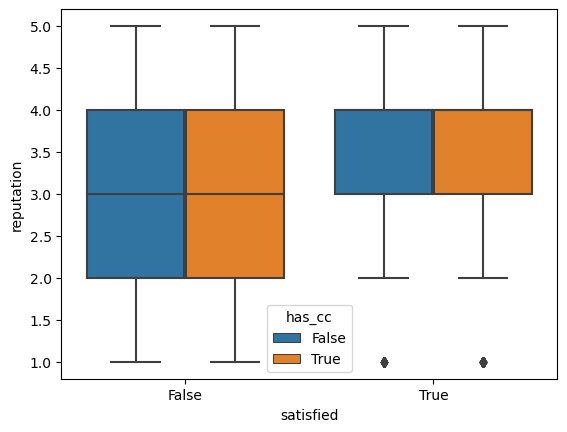

In [18]:
sns.boxplot(x='satisfied',y='reputation',data=df,hue='has_cc')

### Customers have rated 'community involvement' and 'reputation' similarly, which is logical because these are closely related.

<Axes: xlabel='satisfied', ylabel='products_services'>

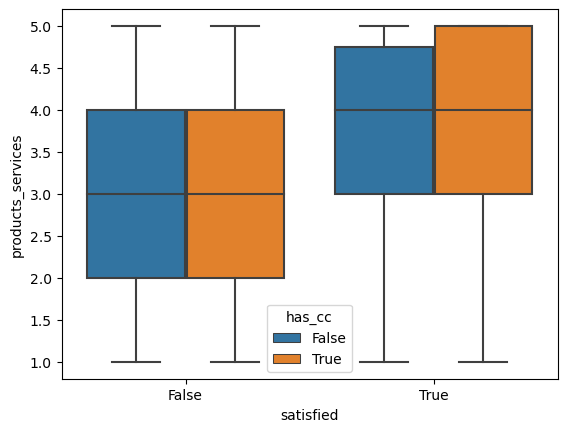

In [19]:
sns.boxplot(x='satisfied',y='products_services',data=df,hue='has_cc')

<Axes: xlabel='satisfied', ylabel='privacy_security'>

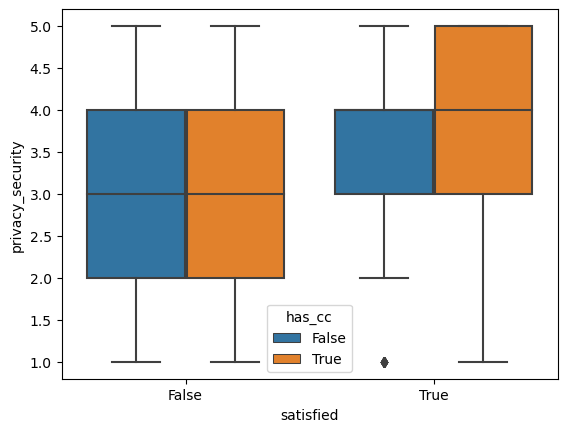

In [20]:
sns.boxplot(x='satisfied',y='privacy_security',data=df,hue='has_cc')

### Lastly, 'privacy security' and 'products services' were also very similarly rated by customers

## Time Series Analysis

In [21]:
df2 = pd.DataFrame().assign(date=df['date'], satisfied=df['satisfied'])
df2

,date,satisfied
0,2022-08-22,True
1,2022-11-23,True
2,2022-01-21,True
3,2022-03-13,True
4,2022-08-08,False
...,...,...
2995,2021-09-23,False
2996,2021-03-07,True
2997,2021-08-01,False
2998,2021-06-25,True


In [22]:
print(type(df2.date[0]))

<class 'str'>


In [23]:
df2['date'] = pd.to_datetime(df2['date'])
df2

,date,satisfied
0,2022-08-22,True
1,2022-11-23,True
2,2022-01-21,True
3,2022-03-13,True
4,2022-08-08,False
...,...,...
2995,2021-09-23,False
2996,2021-03-07,True
2997,2021-08-01,False
2998,2021-06-25,True


In [24]:
df2.sort_values(by='date',ascending=True, inplace=True)
df2

,date,satisfied
1737,2021-01-05,False
886,2021-01-05,False
1707,2021-01-05,False
1790,2021-01-05,False
2671,2021-01-06,True
...,...,...
891,2022-12-22,True
464,2022-12-22,False
203,2022-12-22,False
265,2022-12-22,False


In [25]:
df2.index=df2['date']
df2.drop(['date'],axis=1,inplace=True)
df2

,satisfied
date,
2021-01-05,False
2021-01-05,False
2021-01-05,False
2021-01-05,False
2021-01-06,True
...,...
2022-12-22,True
2022-12-22,False
2022-12-22,False


In [26]:
#converting boolean data for dependent variable to binary
for col_name in df2.columns:
    if(df2[col_name].dtype == 'bool'):
        df2[col_name]= df2[col_name].astype('category')
        df2[col_name] = df2[col_name].cat.codes
df2

,satisfied
date,
2021-01-05,0
2021-01-05,0
2021-01-05,0
2021-01-05,0
2021-01-06,1
...,...
2022-12-22,1
2022-12-22,0
2022-12-22,0


## Since the data distribution is high in density for each year, the length of the data has been broken into periods of 6 months each for better visualisation

In [27]:
dmin, dmax = df2.index.min(), df2.index.max()
dmin, dmax

(Timestamp('2021-01-05 00:00:00'), Timestamp('2022-12-22 00:00:00'))

In [28]:
df3 = df2.loc["2021-01":"2021-06"]
# check the range
dmin2, dmax2 = df3.index.min(), df3.index.max()
dmin2, dmax2

(Timestamp('2021-01-05 00:00:00'), Timestamp('2021-06-30 00:00:00'))

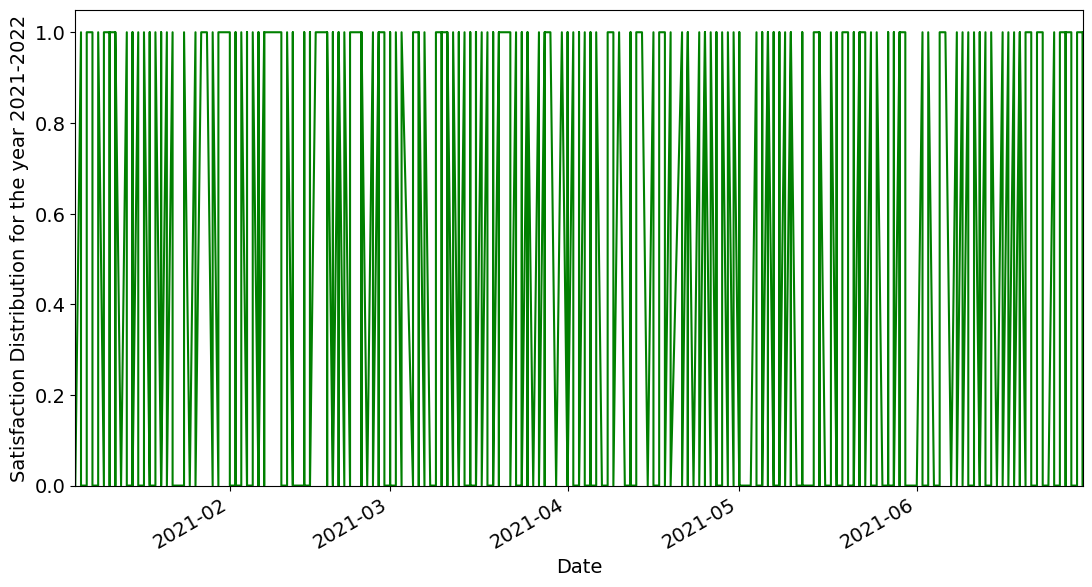

In [29]:
ax = df2["satisfied"].plot(figsize=(13,7), color="green", fontsize=14)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Satisfaction Distribution for the year 2021-2022", fontsize=14);
# ensure the y-axis starts at 0
ax.set_ylim(0)
# only include the exact time period of the data
ax.set_xlim(dmin2, dmax2);

In [30]:
df4 = df2.loc["2021-06":"2021-12"]
# check the range
dmin3, dmax3 = df4.index.min(), df4.index.max()
dmin3, dmax3

(Timestamp('2021-06-01 00:00:00'), Timestamp('2021-12-22 00:00:00'))

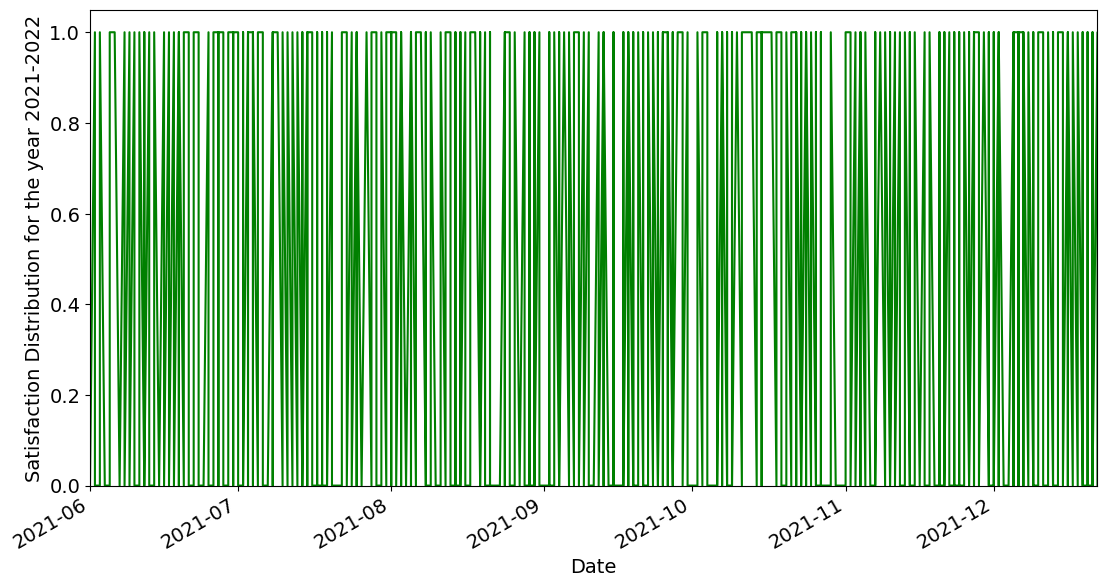

In [31]:
ax1 = df2["satisfied"].plot(figsize=(13,7), color="green", fontsize=14)
ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Satisfaction Distribution for the year 2021-2022", fontsize=14);
# ensure the y-axis starts at 0
ax1.set_ylim(0)
# only include the exact time period of the data
ax1.set_xlim(dmin3, dmax3);

In [32]:
df5 = df2.loc["2021-12-22":"2022-06-30"]
# check the range
dmin4, dmax4 = df5.index.min(), df5.index.max()
dmin4, dmax4

(Timestamp('2021-12-22 00:00:00'), Timestamp('2022-06-30 00:00:00'))

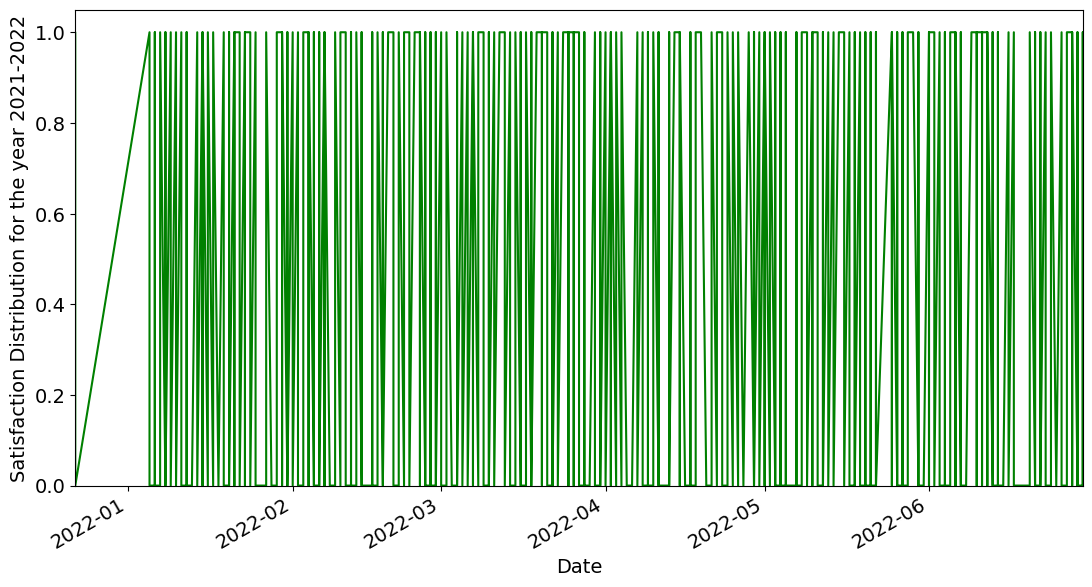

In [33]:
ax2 = df2["satisfied"].plot(figsize=(13,7), color="green", fontsize=14)
ax2.set_xlabel("Date", fontsize=14)
ax2.set_ylabel("Satisfaction Distribution for the year 2021-2022", fontsize=14);
# ensure the y-axis starts at 0
ax2.set_ylim(0)
# only include the exact time period of the data
ax2.set_xlim(dmin4, dmax4);

In [34]:
df6 = df2.loc["2022-06-30":"2022-12"]
# check the range
dmin5, dmax5 = df6.index.min(), df6.index.max()
dmin5, dmax5

(Timestamp('2022-06-30 00:00:00'), Timestamp('2022-12-22 00:00:00'))

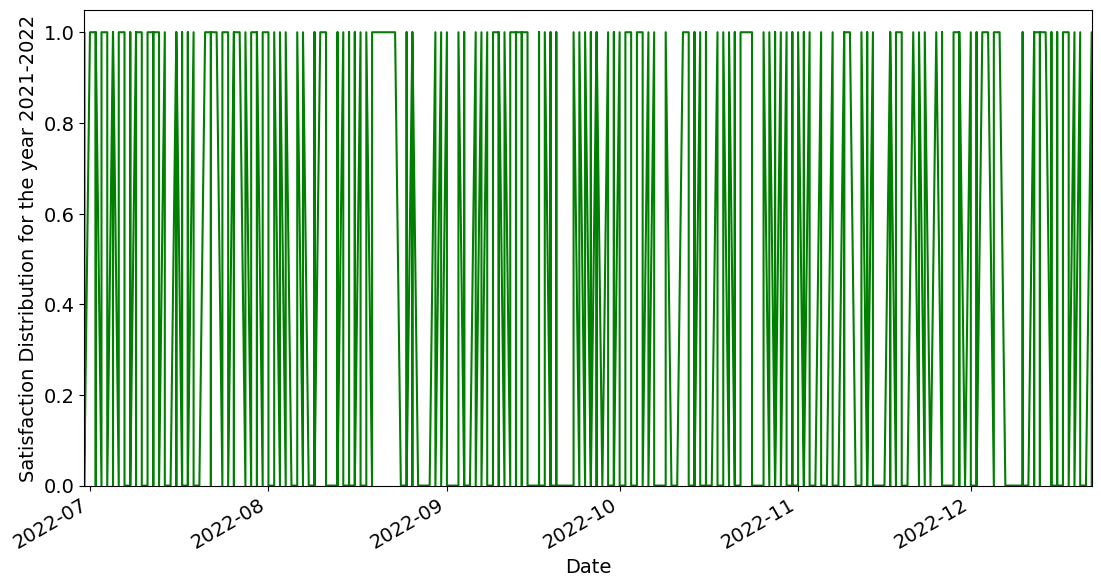

In [35]:
ax3 = df2["satisfied"].plot(figsize=(13,7), color="green", fontsize=14)
ax3.set_xlabel("Date", fontsize=14)
ax3.set_ylabel("Satisfaction Distribution for the year 2021-2022", fontsize=14);
# ensure the y-axis starts at 0
ax3.set_ylim(0)
# only include the exact time period of the data
ax3.set_xlim(dmin5, dmax5);

### Clearly, since the data is binary in nature, the trend doesn't tell us much about the changes in levels of satisfaction with time